In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Dhaka Rent.csv", sep=',')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Do experiment!

In [6]:
df.shape #shows number of rows/colums

(60, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [15]:
df.isnull().sum()

area    0
rent    0
dtype: int64

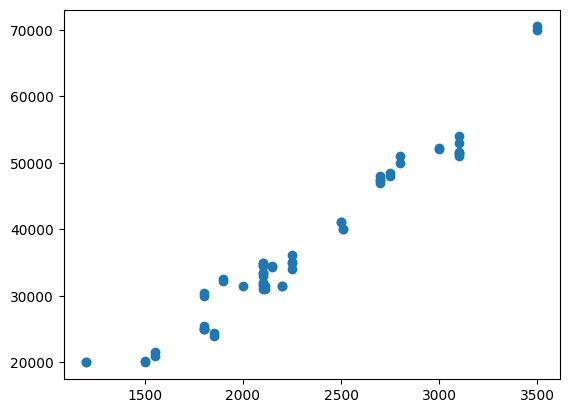

In [8]:
plt.scatter(df['area'], df['rent'])

Text(0.5, 1.0, 'AREA VS RENT IN DHAKA City')

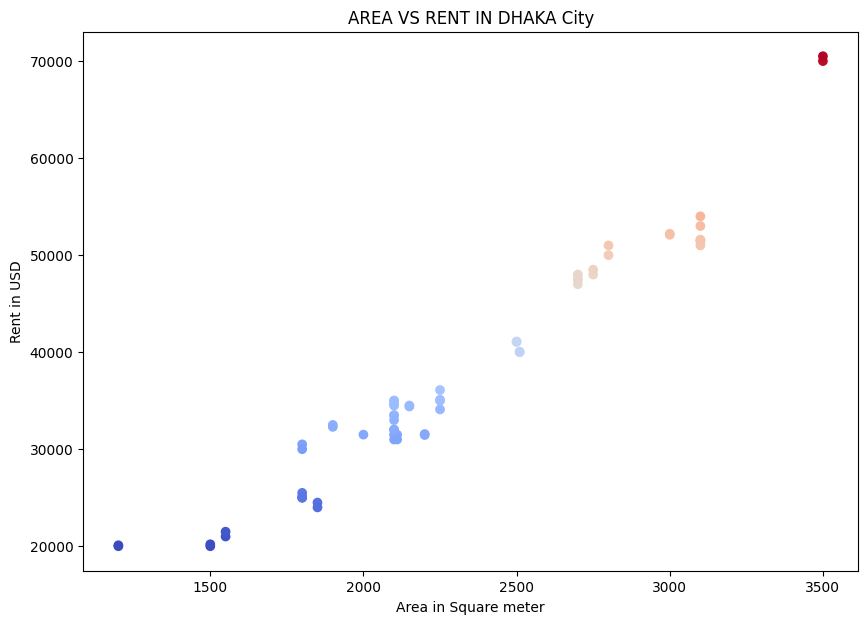

In [4]:
plt.figure(figsize=(10,7))
plt.scatter(df['area'], df['rent'], c=df['rent'], cmap='coolwarm')
plt.xlabel('Area in Square meter')
plt.ylabel('Rent in USD')
plt.title('AREA VS RENT IN DHAKA City')

In [5]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [6]:
x = df['area']
y = df['rent']
dev_x = x-np.mean(x)
dev_y = x-np.mean(y)

In [23]:
m = np.sum(dev_x * dev_y)/ np.sum(dev_x**2)
print(m)

1.0000000000000018


In [24]:
c= np.mean(y) - (m*np.mean(x))
print(c)

34980.16666666666


In [25]:
#y = mx +c
m*2100 +c

np.float64(37080.16666666666)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [16]:
reg.fit(df[['area']], y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
reg.coef_

array([21.29266147])

In [18]:
reg.intercept_

np.float64(-11469.735446431114)

In [19]:
reg. predict([[2100]])

C:\Users\Datorn\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33244.85364815])

In [45]:
reg. predict(df[['area']])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [47]:
df2 = df. copy()
df2['Predicted rent'] = reg.predict(df[['area']])
df2.tail()


,area,rent,Predicted rent
55,3100,54000,54537.515122
56,2750,48500,47085.083606
57,1800,25100,26857.055206
58,2200,31560,35374.119796
59,3100,51600,54537.515122


In [21]:
reg.score(df[['area']], df[['rent']])

0.950249380357677

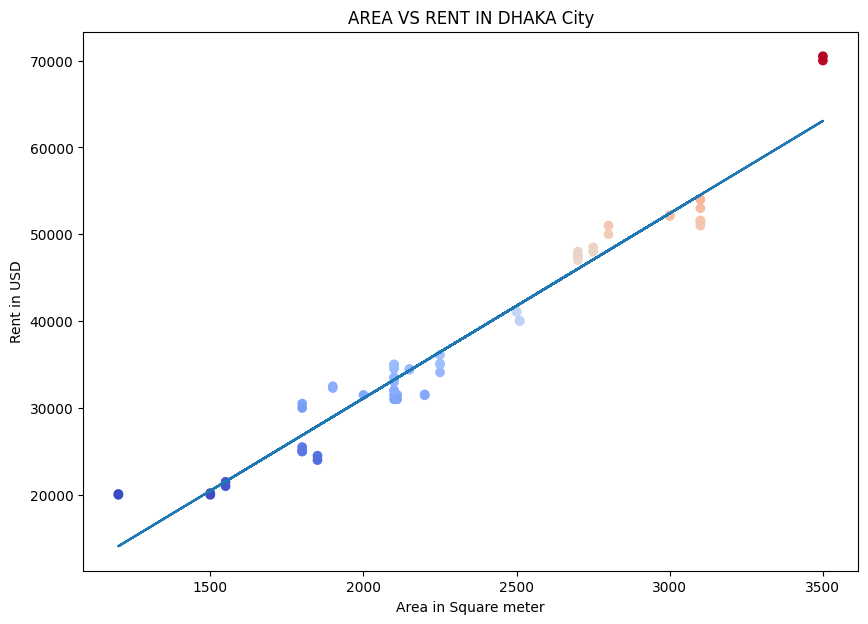

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(df['area'], df['rent'], c=df['rent'], cmap='coolwarm')
plt.xlabel('Area in Square meter')
plt.ylabel('Rent in USD')
plt.title('AREA VS RENT IN DHAKA City')


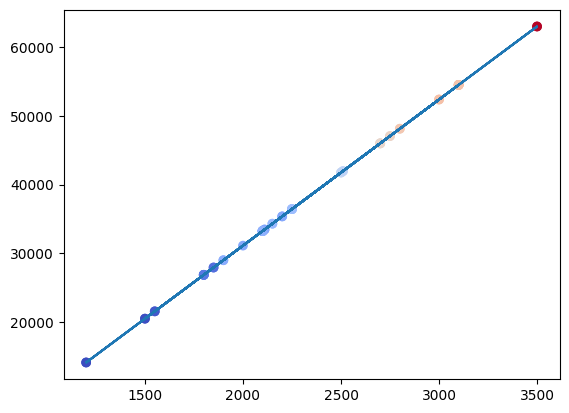

In [36]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.scatter(df['area'], reg.predict(df[['area']]), c=df['rent'], cmap='coolwarm')